In [45]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

In [2]:
covid_data = pd.read_csv('../data/covid_korea/age_gender.csv')

In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82650 entries, 0 to 82649
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    82650 non-null  int64  
 1   confCase      82650 non-null  int64  
 2   confCaseRate  82650 non-null  float64
 3   createDt      82650 non-null  object 
 4   criticalRate  82650 non-null  float64
 5   death         82650 non-null  int64  
 6   deathRate     82650 non-null  float64
 7   category      82650 non-null  object 
 8   seq           82650 non-null  int64  
 9   updateDt      0 non-null      float64
dtypes: float64(4), int64(4), object(2)
memory usage: 6.3+ MB


In [5]:
covid_data.describe()

,Unnamed: 0,confCase,confCaseRate,criticalRate,death,deathRate,seq,updateDt
count,82650.000000,82650.000000,82650.000000,82650.000000,82650.000000,82650.000000,82650.000000,0.0
mean,41325.500000,3625.407368,18.175832,3.390340,65.223509,18.175877,2732.180351,NaN
std,23859.144211,3974.910582,16.382815,6.518453,83.360684,21.290709,1630.896744,NaN
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,20663.250000,1092.000000,5.670000,0.000000,0.000000,0.000000,1341.000000,NaN
50%,41325.500000,2150.000000,13.090000,0.575000,16.000000,5.190000,2680.500000,NaN
75%,61987.750000,4651.000000,19.730000,2.430000,130.000000,46.890000,4130.000000,NaN
max,82650.000000,27268.000000,60.100000,26.680000,394.000000,53.630000,5609.000000,NaN


In [25]:
deathRate = pd.DataFrame()
covid_data['day'] = covid_data['createDt'].apply(lambda x : x[:10])

In [26]:
covid_data.day

0        2020-12-23
1        2020-12-23
2        2020-12-23
3        2020-12-23
4        2020-12-23
            ...    
82645    2020-04-02
82646    2020-04-02
82647    2020-04-02
82648    2020-04-02
82649    2020-04-02
Name: createDt, Length: 82650, dtype: object

In [27]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82650 entries, 0 to 82649
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    82650 non-null  int64  
 1   confCase      82650 non-null  int64  
 2   confCaseRate  82650 non-null  float64
 3   createDt      82650 non-null  object 
 4   criticalRate  82650 non-null  float64
 5   death         82650 non-null  int64  
 6   deathRate     82650 non-null  float64
 7   category      82650 non-null  object 
 8   seq           82650 non-null  int64  
 9   updateDt      0 non-null      float64
 10  day           82650 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 6.9+ MB


In [33]:
covid_data.groupby('day')['deathRate'].mean()

day
2020-04-02    18.182727
2020-04-07    16.750000
2020-04-08    18.181818
2020-04-09    18.181818
2020-04-10    18.181818
2020-04-11    18.181818
2020-04-12    18.181818
2020-04-13    18.181818
2020-04-14    18.181818
2020-04-15    18.180909
2020-04-16    18.180909
2020-04-17    18.181818
2020-04-18    18.181818
2020-04-19    18.180909
2020-04-20    18.182727
2020-04-21    18.182727
2020-04-22    18.181818
2020-04-23    18.180909
2020-04-24    18.180909
2020-04-25    18.180909
2020-04-26    18.181818
2020-04-27    18.180909
2020-04-28    18.181818
2020-04-29    18.181818
2020-04-30    18.180909
2020-05-01    18.181818
2020-05-02    18.181818
2020-05-03    18.181818
2020-05-04    18.181818
2020-05-05    18.181818
2020-05-06    18.181818
2020-05-07    18.181818
2020-05-08    18.181818
2020-05-09    18.181818
2020-05-10    18.181818
2020-05-11    18.181818
2020-05-12    18.180909
2020-05-13    18.181818
2020-05-14    18.182727
2020-05-15    18.182727
2020-05-16    18.181818
2020-05-17  

In [34]:
covid_korea = pd.read_csv('../data/covid_korea/covid_kr.csv')

In [35]:
covid_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      366 non-null    int64  
 1   accDefRate      306 non-null    float64
 2   accExamCnt      306 non-null    float64
 3   accExamCompCnt  306 non-null    float64
 4   careCnt         306 non-null    float64
 5   clearCnt        366 non-null    int64  
 6   createDt        366 non-null    object 
 7   deathCnt        366 non-null    int64  
 8   decideCnt       366 non-null    int64  
 9   examCnt         366 non-null    int64  
 10  resutlNegCnt    306 non-null    float64
 11  seq             366 non-null    int64  
 12  stateDt         366 non-null    int64  
 13  stateTime       366 non-null    object 
 14  updateDt        29 non-null     object 
dtypes: float64(5), int64(7), object(3)
memory usage: 43.0+ KB


In [36]:
covid_korea['day'] = covid_korea['createDt'].apply(lambda x: x[:10])

In [39]:
deathRate = covid_korea.groupby('day')[['deathCnt', 'decideCnt']].sum()

In [46]:
deathRate['deathRate'] = (deathRate['deathCnt'].div(deathRate['decideCnt'])*100).fillna(0)

<AxesSubplot:xlabel='day'>

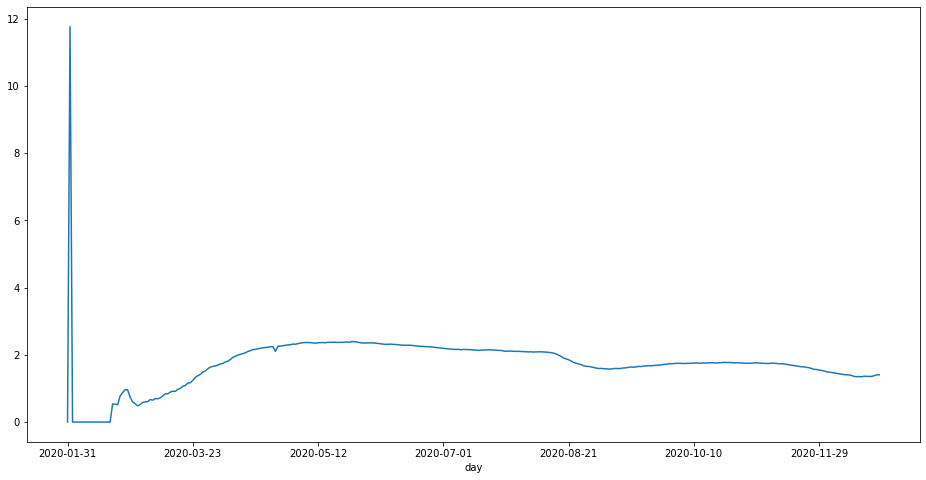

In [54]:
plt.figure(figsize=(16, 8))
deathRate.deathRate.plot()

<AxesSubplot:xlabel='day'>

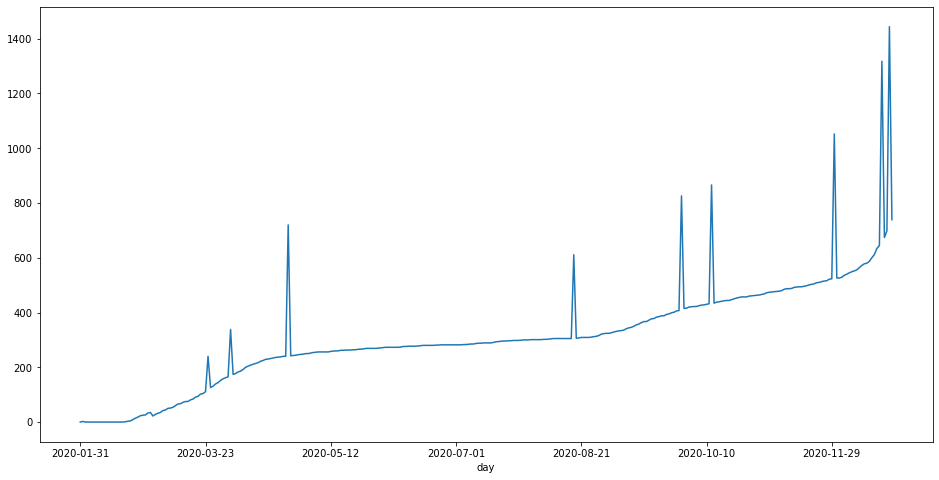

In [52]:
plt.figure(figsize=(16, 8))
deathRate.deathCnt.plot()

<AxesSubplot:xlabel='day'>

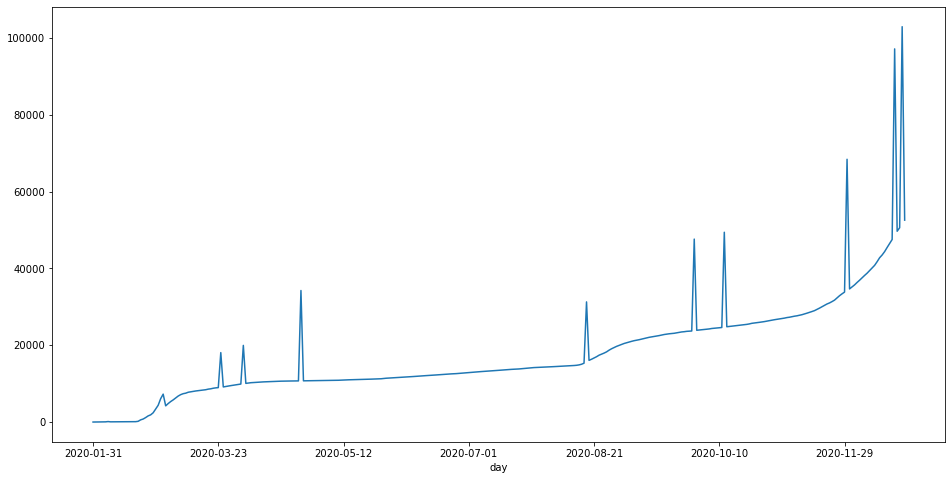

In [56]:
plt.figure(figsize=(16, 8))
deathRate.decideCnt.plot()

새로운 데이터  
https://kdx.kr/data/view/25918